# Task#7. Stock-Market-Prediction-using-Numerical-and-Textual-Analysis

## GRIP@ The Spark Foundation

### Author: Jyoti Adate

### Problem Statement- 
Create the hybrid model for stock price/performance prediction numerical analysis of historical stock price and sentimenatal analysis of news headlines

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf


In [9]:
News=pd.read_csv('india-news-headlines.csv')
News.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [10]:
Stock=pd.read_csv('GME_stock.csv')
Stock.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [11]:
Stock['date']=pd.to_datetime(Stock['date'])
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4773 non-null   datetime64[ns]
 1   open_price      4773 non-null   float64       
 2   high_price      4773 non-null   float64       
 3   low_price       4773 non-null   float64       
 4   close_price     4773 non-null   float64       
 5   volume          4773 non-null   float64       
 6   adjclose_price  4773 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 261.1 KB


In [12]:
Stock.dropna(inplace=True)

Text(0, 0.5, 'close_price')

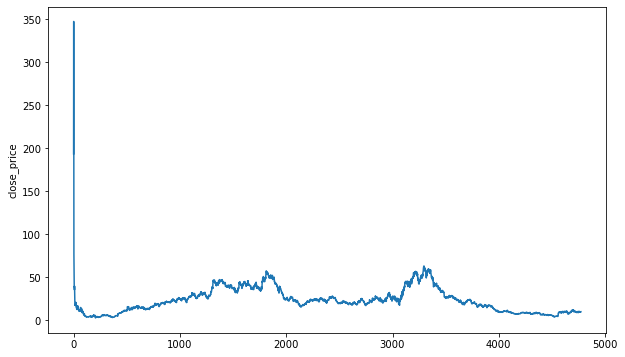

In [13]:
plt.figure(figsize=(10, 6))
Stock['close_price'].plot()
plt.ylabel('close_price')

### Plotting Moving Average

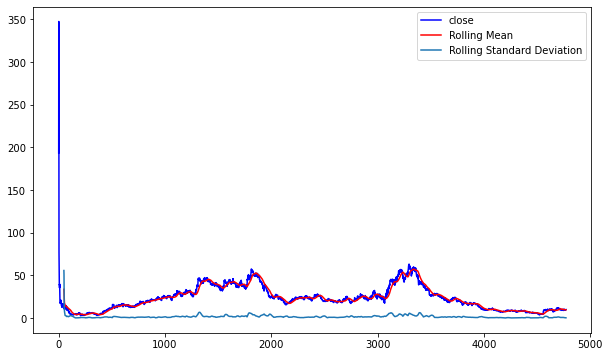

In [14]:
close=Stock['close_price']
mea=close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(10,6))
Stock['close_price'].plot(color='b',label='close')
mea.plot(color='r',label='Rolling Mean')
std.plot(label='Rolling Standard Deviation')
plt.legend()

### Plotting return

Text(0.5, 1.0, 'Returns')

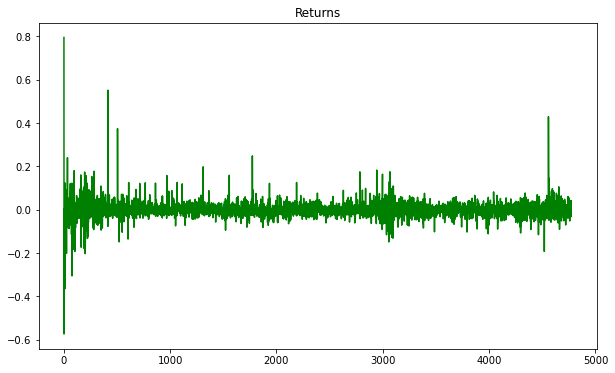

In [15]:
returns=close/close.shift(1)-1
plt.figure(figsize=(10,6))
returns.plot(label='Return',color='g')
plt.title('Returns')

In [16]:
train=Stock[:1000]
test=Stock[1000:]


### Stationarity test

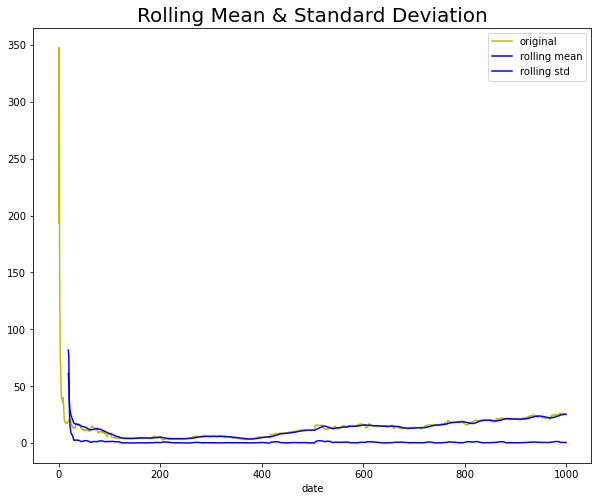

Results of dickey fuller test


NameError: name 'adfuler' is not defined

In [17]:
def test_stationarity(timeseries):
    
    # Determining rolling statistics
    
    rolman=timeseries.rolling(20).mean()
    rolstd=timeseries.rolling(20).std()
    
    #plot rolling statistics
    
    plt.figure(figsize=(10,8))
    plt.plot(timeseries,color='y',label='original')
    plt.plot(rolman,color='b',label='rolling mean')
    plt.plot(rolstd,color='b',label='rolling std')
    plt.xlabel('date')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation',fontsize=20)
    plt.show(block=False)
    print('Results of dickey fuller test')
    result=adfuler(timeseries,autolog='AIC')
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 
    for value,label in zip(result,labels):
        print(label+ ':' +str(value))
    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['close_price'])

In [ ]:
train_log=np.log(train['close_price'])
test_log=np.log(test['close_price'])

mav=train_log.rolling(24).mean()
plt.figure(figsize=(10,6))
plt.plot(train_log)
plt.plot(mav,color='red')

In [ ]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

 # India-News-Headlines

In [ ]:
# read the dataset
News=pd.read_csv('india-news-headlines.csv')
News.head()

In [ ]:

News.drop('headline_category', axis = 1, inplace=True)
News.info()

#### Converting data type of Date column 

In [ ]:

News['publish_date'] = pd.to_datetime(News['publish_date'],format= '%Y%m%d')
News

#### Grouping the headlines for each day

In [ ]:
News['headline_text'] =News.groupby(['publish_date']).transform(lambda x : ' '.join(x)) 
News = News.drop_duplicates() 
News.reset_index(inplace = True, drop = True)
News

In [ ]:
News['headline_text']

#### import some Lybraries

In [33]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cool\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cool\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


#### Cleaning headlines

In [34]:
c = []
for i in range(0,len(News['headline_text'])):
    news = re.sub('[^a-zA-Z]',' ',News['headline_text'][i])
    news = news.lower()
    news = news.split()
   # news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [35]:
#News['Headline_text']=pd.Series(c)
News


,publish_date,headline_category,headline_text,Headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...
1,20010102,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit
2,20010102,unknown,America's unwanted heading for India?,america s unwanted heading for india
3,20010102,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa
4,20010102,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic
...,...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...,govt extends deadline for use of fastag till f...


#### Functions to get the subjectivity and polarity


In [38]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

#### Adding subjectivity and polarity columns


In [44]:
News['Subjectivity'] =News['headline_text'].apply(getSubjectivity)
News['Polarity'] = News['headline_text'].apply(getPolarity)
News

,publish_date,headline_category,headline_text,Headline_text,Subjectivity,Polarity
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,0.000000,0.000000
1,20010102,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,0.000000,0.000000
2,20010102,unknown,America's unwanted heading for India?,america s unwanted heading for india,0.000000,0.000000
3,20010102,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,0.000000,0.000000
4,20010102,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...,0.500000,0.500000
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...,0.500000,0.500000
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,covid despite dip in cases rajasthan among top...,0.500000,0.500000
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...,govt extends deadline for use of fastag till f...,0.000000,0.000000


<AxesSubplot:>

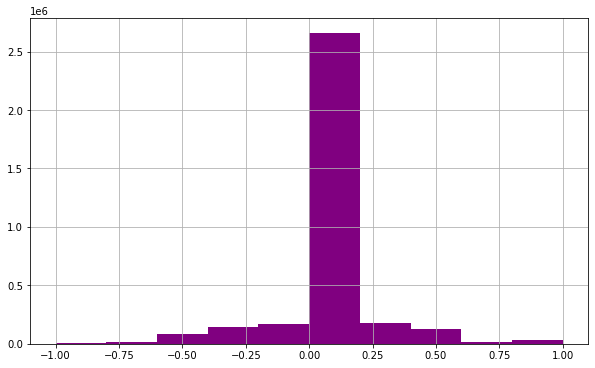

In [45]:
plt.figure(figsize = (10,6))
News['Polarity'].hist(color = 'purple')

In [46]:
#plt.figure(figsize = (10,6))
#News['Subjectivity'].hist(color = 'blue')

### Adding sentiment score to df_news

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
sia = SentimentIntensityAnalyzer()

News['Compound'] = [sia.polarity_scores(v)['compound'] for v in News['headline_text']]
News['Negative'] = [sia.polarity_scores(v)['neg'] for v in News['headline_text']]
News['Neutral'] = [sia.polarity_scores(v)['neu'] for v in News['headline_text']]
News['Positive'] = [sia.polarity_scores(v)['pos'] for v in News['headline_text']]
News

In [ ]:
News=pd.merge(News,

### Combine the 'Stock_Prediction_data' and 'News_headlines_data' and to Create Hybrid Model